#1) Pengumpulan Data

Dataset yang dikumpulkan bersumber dari UC Irvine Machine Learning Repository, yaitu repositori online yang terkenal untuk kumpulan data yang digunakan oleh komunitas pembelajaran mesin dan data science. Dataset yang digunakan adalah dataset yang membahas mengenai Heart Disease yaitu database dari *Hungary* dengan nama file "hungarian.data" dengan link sebagai berikut: https://archive.ics.uci.edu/dataset/45/heart+disease.

Dataset ini mencakup data pasien yang dikumpulkan dari *Hungary* yang
berisi variabel atau informasi klinis dan fisik pasien yang berkaitan dengan penyakit jantung seperti umur, jenis kelamin, tekanan darah, kadar kolesterol, hasil elektrokardiogram, dan lainnya.Diharapkan dengan digunakannya dataset ini dapat digunakan dan berkontribusi untuk upaya memahami dan  memprediksi penyakit jantung, dari yang sehat sampai pada tingkatan penyakit jantungnya.



#2) Menelaah Data

Pada tahap menelaah data dilakukan pemeriksaan awal untuk mamahami struktur dan isi dalam data.

Import library yang digunakan untuk menelaah proyek ini yaitu:
1. **pandas** yang digunakan untuk analisis data
2. **re** atau **RegEx** digunakan untuk pencarian, manipulasi, dan validasi string
3. **numpy** digunakan untuk berbagai fungsi matematika tingkat tinggu untuk operasi pada array
4. **itertools** digunakan untuk bekerja dengan iterasi data





In [1]:
import pandas as pd
import re
import numpy as np
import itertools

## Load Data

In [2]:
# cara 1 -> upload dataset pada google colab, namun kelemahannya ketika runtime terputus perlu dilakukan upload ulang dataset
# dir = 'hungarian.data'

In [3]:
# cara 2 -> upload dataset pada gdrive
# dir adalah variabel yang digunakan untuk menyimpan data dengan path dari google colab

dir = '/content/drive/MyDrive/KULIAH/Semester 7/BIMBINGAN KARIER (4701)/Sertifikasi/Database/hungarian.data'

In [4]:
# mengizinkan Gcollab mengakses gdrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fungsi *ls* digunakan untuk menampilkan isi folder, tujuannya untuk memastikan bahwa file data yang diperlukan untuk analisis sudah tersedia di lokasi yang benar

In [5]:
!ls '/content/drive/MyDrive/KULIAH/Semester 7/BIMBINGAN KARIER (4701)/Sertifikasi/Database'

ask-detrano	heart-disease.names  processed.cleveland.data	 rf_pkl
bak		hungarian.data	     processed.hungarian.data	 switzerland.data
cleveland.data	Index		     processed.switzerland.data  WARNING
cleve.mod	long-beach-va.data   processed.va.data
costs		new.data	     reprocessed.hungarian.data


In [6]:
# iterasi untuk membaca dataset per-10 baris, karena dilihat berdasarkan pola iterasi yang sama setiap 10 baris

with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines [0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [7]:
# iterasi sesuai jumlah kolom dan baris, di mana kolom pada dataset berjumlah 76

data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [8]:
# mengetahui ringkasan informasi dalam dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Dataset yang digunakan dalam proyek ini memiliki karakteristik khusus di mana nilai null direpresentasikan dengan angka -9.0. Oleh karena itu, diperlukan penghapusan fitur-fitur tertentu pada data dengan tipe data object atau string.

In [9]:
# menghapus kolom yang berisikan ID pasien, karena merupakan data kategorikal

df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [10]:
# mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yang disimbolkan dengan angka -9.0

df = df.astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

#3) Validasi Data

Pada tahap validasi data dilakukan pemeriksaan lebih lanjut dengan pengecekan dan penanganan nilai yang hilang.

In [12]:
# mengubah nilai -9.0 menjadi nilai null value

df.replace(-9.0, np.nan, inplace=True)

In [13]:
# menghitung jumlah null

df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [14]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

#4) Menentukan Object Data

Memilih 14 fitur yang akan digunakan sesuai dengan deksripsi dataset


In [16]:
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [17]:
df_selected.tail()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,NaN,NaN,NaN,0.0


In [18]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [19]:
# mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43:'ca',
    50: 'thal',
    57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-19-444b004c7d2a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [20]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [21]:
# menghitung jumlah fitur pada dataset

df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

#5) Membersihkan Data

Tahapan membersihkan data bertujuan untuk memperbaiki atau menghilangkan data yang tidak akurat, tidak lengkap, atau tidak relevan dalam dataset. Beberapa proses yang dilakukan yaitu seperti identifikasi dan penanganan nilai yang hilang serta menghapus data yang duplikat dan mencari korelasi antar data atau fitur.

## Null Values

In [22]:
# menghitung jumlah null values

df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Terlihat pada jumlah null values pada tiap fitur bahwa terdapat beberapa fitur yang jumlah null values-nya hampir 90% dari datanya, sehingga perlu dilakukan penghapusan fitur.

In [23]:
# menghapus fitur dengan jumlah null values hampir 90%

columns_to_drop = ['ca', 'slope','thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [24]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [25]:
df_selected['chol']

0      289.0
1      180.0
2      283.0
3      214.0
4        NaN
       ...  
289    308.0
290    166.0
291    211.0
292    257.0
293    182.0
Name: chol, Length: 294, dtype: float64

Kemudian, terlihat juga masih ada beberapa fitur yang memiliki null values. Maka dari itu, perlu dilakukan pengisian null values dengan nilai mean dari setiap fitur. Penggunaan nilai mean sebagai pengisian null values dilakukan untuk membantu menjaga distribusi keseluruhan data sehingga tidak mempengaruhi analisis dan model pembelajaran yang akan digunakan.

In [26]:
# menghapus seluruh null values pada fitur

meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [27]:
# mengubah tipe data pada variabel mean... menjadi float

meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [28]:
# menghitung rata-rata dari fitur dan kemudian membulatkan hasil perhitungan

meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

In [29]:
# mengisi null values menjadi nilai mean yang telah ditentukan

fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
              'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
df_clean = df_selected.fillna(value=fill_values)

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [31]:
df_clean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Akhirnya, seluruh null values tidak ada pada dataset dan dapat dilakukan langkah selanjutnya.

## Duplicate Data

In [32]:
# pengecekan data duplikat

duplicate_rows = df_clean.duplicated()
df_clean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [33]:
# cetak semua data duplikat

print('All Duplicate Rows:')
df_clean[df_clean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [34]:
# menghapus data duplikat

df_clean = df_clean.drop_duplicates()
print('All Duplicate Rows:')
df_clean[df_clean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [35]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


## Data Correlation

Import library yang digunakan dalam menampilan korelasi data, yaitu:
1. **seaborn** yang digunakan untuk menggambar grafik statistik yang menarik dan informatif
2. **matplotlib** yang digunakan untuk membuat berbagai jenis grafik

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

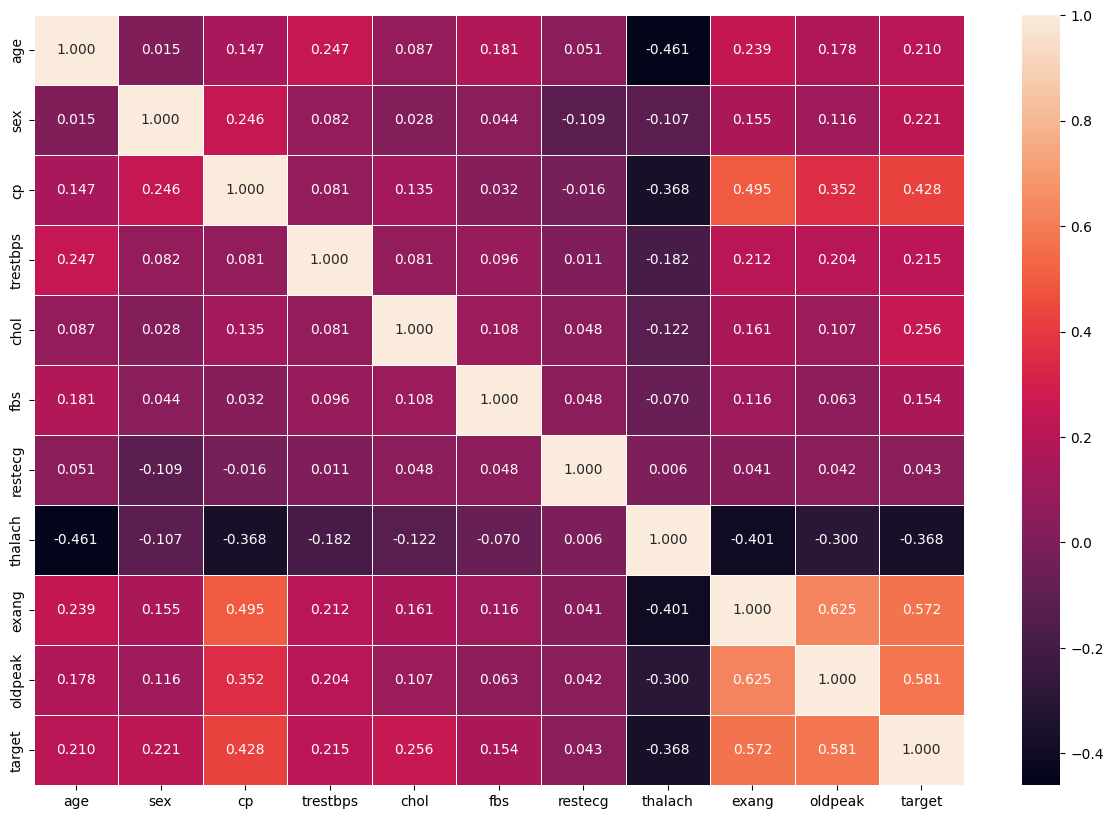

In [37]:
cor_mat = df_clean.corr()
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

Dapat dilihat bahwa diagonal utama pada heatmap, dari kiri atas ke kanan bawah selalu memiliki nilai korelasi 1, karena ini menunjukkan korelasi setiap fitur dengan dirinya sendiri. Selanjutnya, fitur cp, thalach, dan oldpeak memiliki korelasi positif yang cukup kuat dengan fitur target, yang menunjukkan bahwa 3 fitur tersebut 'mungkin' berhubungan dengan fitur target. Selain itu fitur exang memiliki korelasi negatif dengan fitur target, yang juga menunjukkan 'kemungkinan' adanya hubungan dengan kondisi target.

#6) Konstruksi Data

Tahapan selanjutnya yaitu Konstruksi Data dengan melakukan antara lain memisahkan kolom fitur dan kolom target, menyeimbangkan data target, normalisasi data, dan yang terakhir membagi data menjadi data train dan data test.

## Memisahkan Data Target

In [38]:
# melakukan penghapusan kolom target untuk variabel x dan mengambil kolom target saja untuk variabel y

x = df_clean.drop('target', axis=1).values
y = df_clean.iloc[:,-1]

## Menyeimbangkan Data

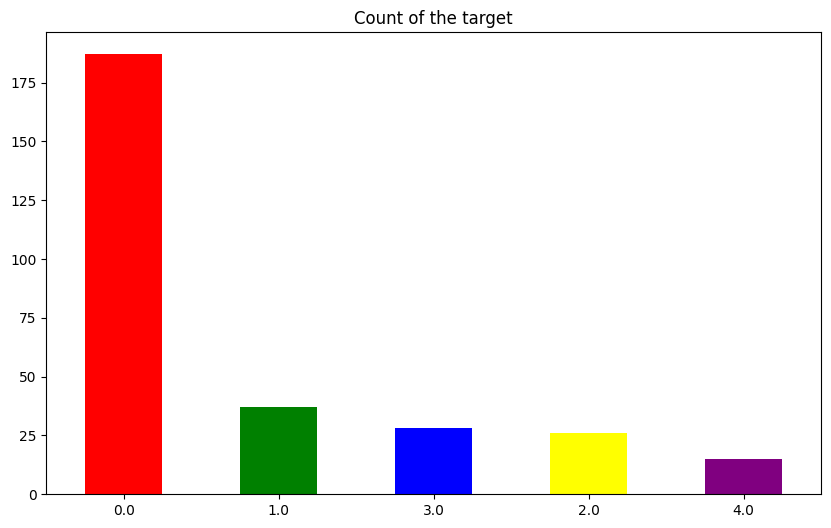

In [39]:
# pengecekan persebaran jumlah target

df_clean['target'].value_counts().plot(kind='bar',
                                       figsize=(10,6),
                                       color=['red', 'green', 'blue', 'yellow', 'purple'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Dapat dilihat bahwa pada grafik diatas menunjukkan persebaran jumlah pada target tidak seimbang, sehingga perlu dilakukan penyeimbangan data dengan melakukan oversampling. Oversampling dilakukan karena jumlah dataset pada proyek ini sedikit. Metode yang digunakan yaitu SMOTE (Synthetic Minority Oversampling Technique).

In [40]:
# mengimpor kelas SMOTE yang ada dalam pustaka imblearn yaitu pustaka Python yang menawarkan teknik untuk mengatasi masalah ketidakseimbangan kelas dalam dataset

from imblearn.over_sampling import SMOTE

In [41]:
smote = SMOTE(random_state=42)
x_smote_resampled, y_smote_resampled = smote.fit_resample(x, y)

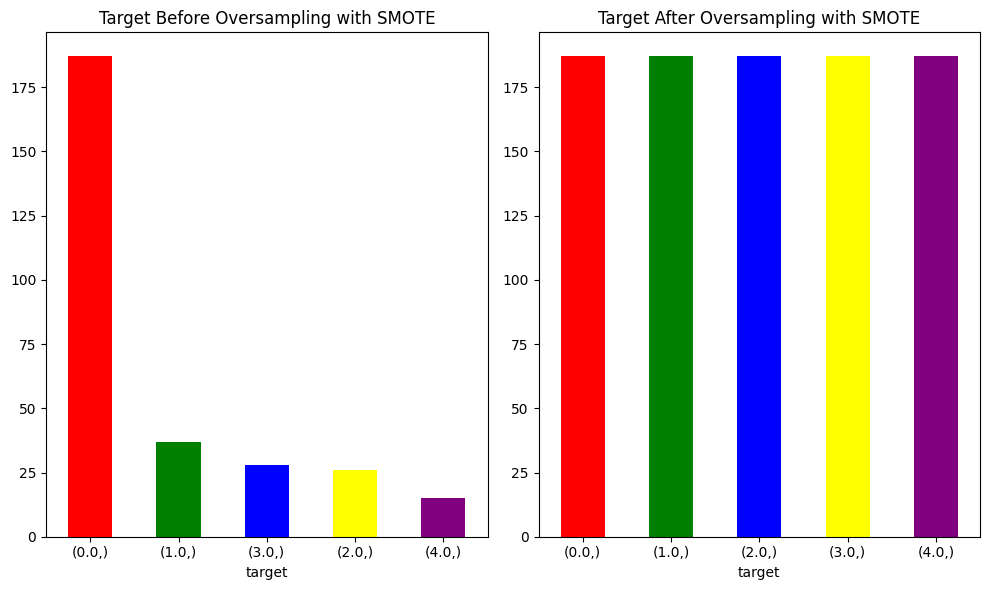

In [42]:
# membandingkan target yang telah dilakukan oversampling dan target yang belum dilakukan oversampling

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['red','green','blue','yellow', 'purple'])
plt.title("Target Before Oversampling with SMOTE")
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['red','green','blue','yellow', 'purple'])
plt.title("Target After Oversampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

Dari pembandingan grafik yang ditampilkan, terlihat bahwa penerapan teknik Oversampling SMOTE telah berhasil menyeimbangkan distribusi data secara efektif.

## Normalisasi Data

In [43]:
df_clean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Dari analisis deskriptif dataset, terlihat bahwa terdapat variasi yang signifikan dalam standar deviasi, atau simpangan baku, di antara fitur-fitur dalam dataset. Oleh karena itu, diperlukan proses normalisasi untuk mengurangi perbedaan rentang nilai standar deviasi antar fitur tersebut dengan menggunakan MinMaxScaler. MinMaxScaler digunakan untuk mengubah fitur dengan menskalakan setiap fitur ke rentang antara 0 dan 1 atau -1 dan 1.

In [44]:
# mengimpor MinMaxScaler dari modul preprocessing yang ada dalam pustaka Scikit-learn

from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()
x_smote_resampled_normal = scaler.fit_transform(x_smote_resampled)

In [46]:
len(x_smote_resampled_normal)

935

In [47]:
df_check1 = pd.DataFrame(x_smote_resampled_normal)
df_check1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada dataset dapat terlihat bahwa rentang pada standar deviasi setiap fitur dataset menjadi lebih sama dan tidak terlalu jauh.

## Membagi Data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# membagi fitur dan target menjadi data train dan test untuk dataset yang sudah di oversampling

x_train, x_test, y_train, y_test = train_test_split(x_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

In [50]:
# membagi fitur dan target menjadi data train dan test untuk dataset yang sudah dilakukan oversampling dan normalisasi

x_train_normal, x_test_normal, y_train_normal, y_test_normal = train_test_split(x_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

#7) Membangun Model

Tahapan berikutnya yaitu membangun model dengan memilih beberapa algorima untuk prediksi penyakit yaitu:
1. KNN (K-Nearest Neighbors)
2. Random Forest
3. XGBoost

In [51]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

Membuat fungsi evaluasi untuk perhitungan hasil akurasi dan rata-rata dari recall, f1, dan precision score dari setiap model.

In [52]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

## Data Oversampling

### KNN

Membangun model menggunakan algoritma KNN dengan nilai neighbors 3, alasan pengggunaan nilai neighbors 3 digunakan untuk menghindari kebuntuan, maka nilai ganjil lebih baik digunakan.

In [54]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
y_pred_knn = knn_model.predict(x_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [56]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


Menampilkan confusion matrix untuk membandingkan nilai prediksi model dengan nilai yang sesungguhnya.

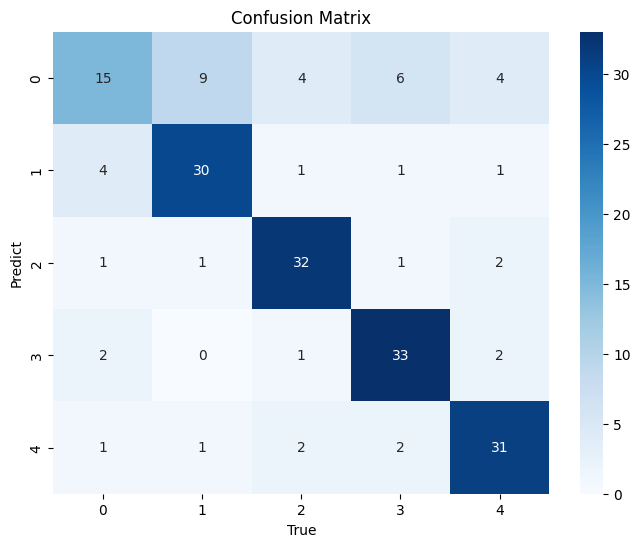

In [57]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

Membangun model menggunakan algoritma Random Forest dengan jumlah n_estimators sebesar 100. Di mana n_estimators berguna untuk mengatur jumlah pohon keputusan yang dibangun.

In [58]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred_rf = rf_model.predict(x_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [60]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


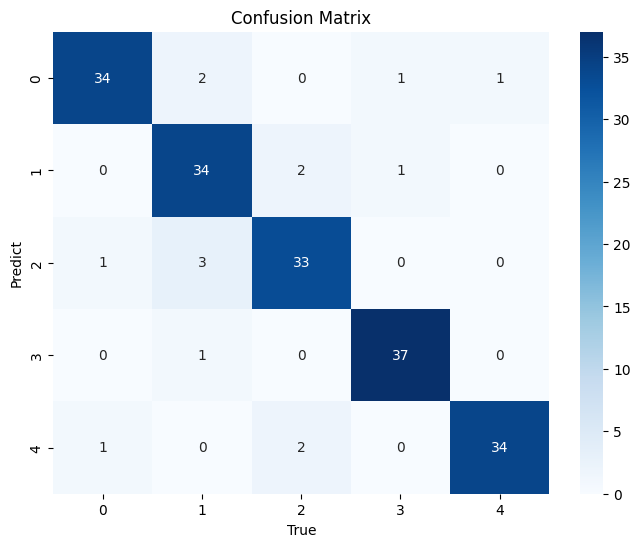

In [61]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

Membangun model menggunakan XGBoost dengan learning rate sebesar 0,1. Di mana learning rate digunakan untuk mengontrol seberapa besar dalam menyesuaikan bobot model.

In [62]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [63]:
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [64]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


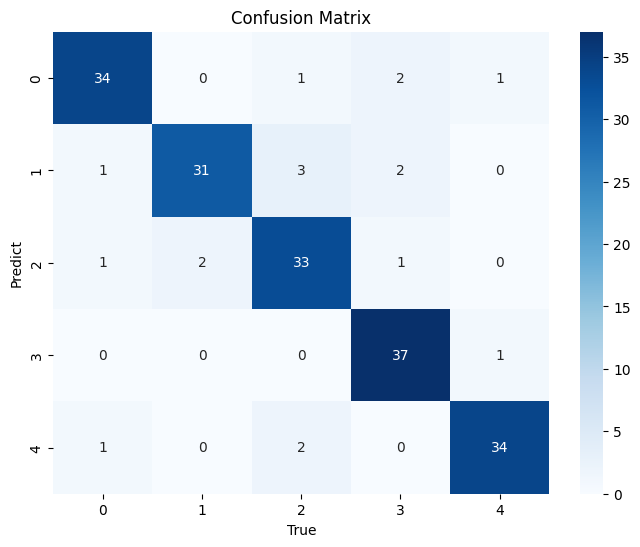

In [65]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Data Oversampling + Normalisasi

### KNN

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [67]:
y_pred_knn = knn_model.predict(x_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [68]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


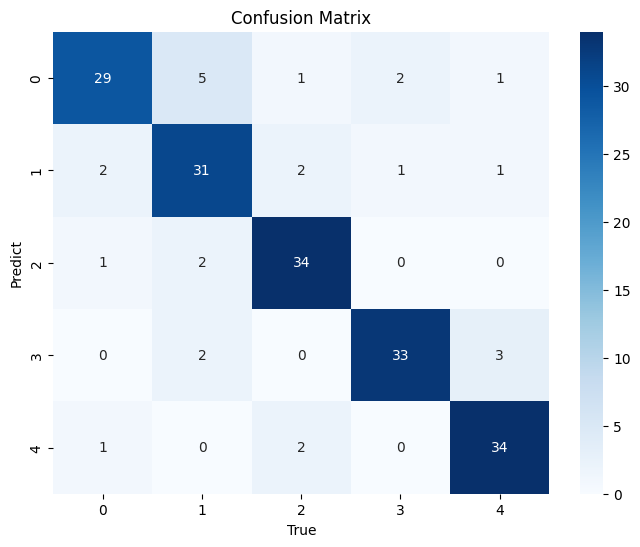

In [69]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [70]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [71]:
y_pred_rf = rf_model.predict(x_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))



Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [72]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


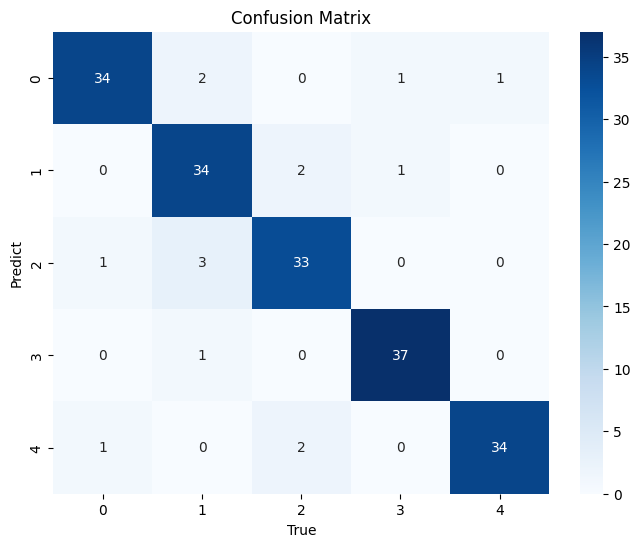

In [73]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

In [74]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(x_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [75]:
y_pred_xgb = xgb_model.predict(x_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [76]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


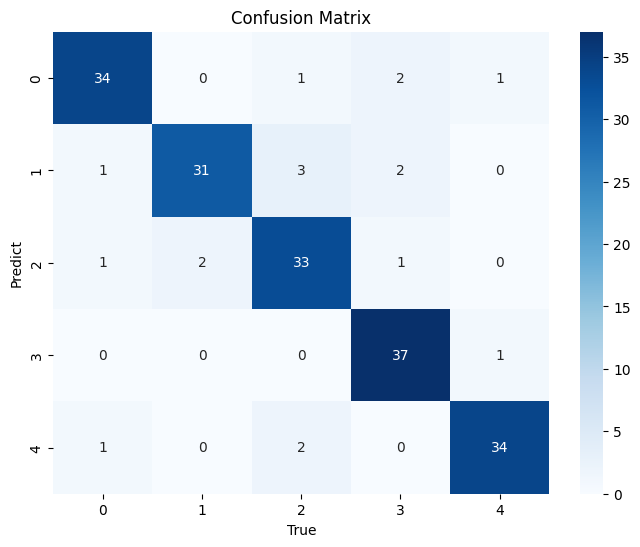

In [77]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Data Tunning + Oversampling + Normalisasi

Tunning Data merupakan proses penyesuaian dan optimasi untuk meningkatkan kinerja dan efektivitas model. Salah satunya dengan memastikan data yang digunakan untuk training dan testing model adalah representasi terbaik dari masalah yang akan dipecahkan dan diharapkan dengan Tunning Data dapat mengembangkan model prediksi dengan lebih akurat. Pada proyek ini Tunning Data menggunakan RandomizedSearchCV dari pustaka scikit-learn.

In [78]:
# tunning data

from sklearn.model_selection import RandomizedSearchCV

### KNN

In [79]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)


knn_model.fit(x_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 52, 'algorithm': 'kd_tree'}


In [80]:
y_pred_knn = knn_model.predict(x_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [81]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.923}


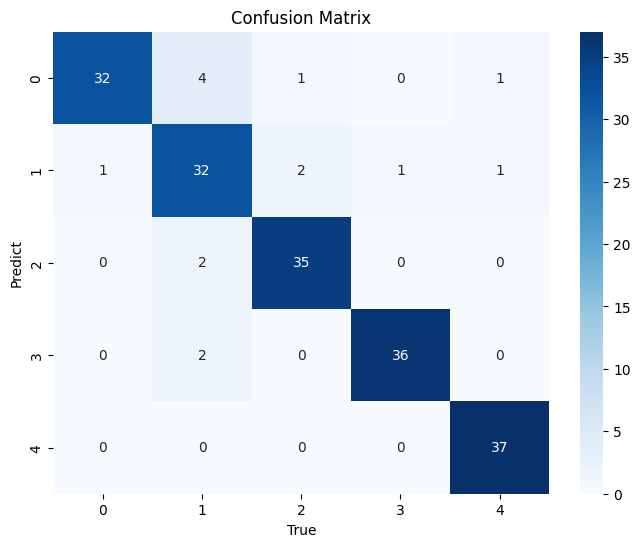

In [82]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [83]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(x_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [84]:
y_pred_rf = rf_model.predict(x_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.84      0.86      0.85        37
         2.0       0.86      0.86      0.86        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [85]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.909, 'recall': 0.909, 'F1 score': 0.909, 'Precision score': 0.91}


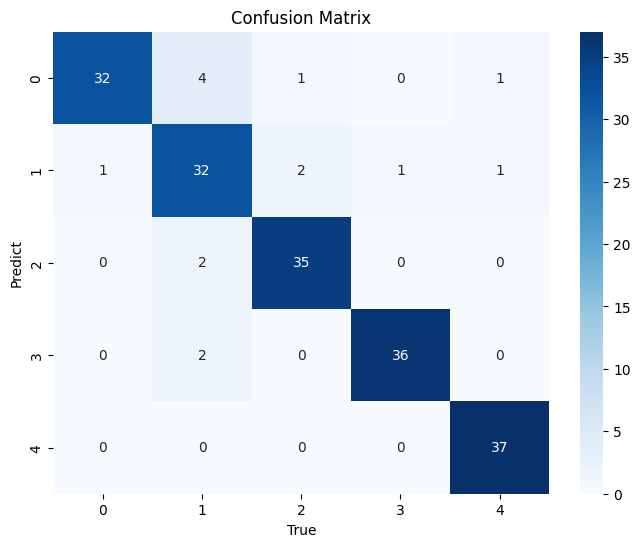

In [86]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

In [87]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)


xgb_model.fit(x_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [88]:
y_pred_xgb = xgb_model.predict(x_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.91      0.84      0.87        37
         2.0       0.89      0.89      0.89        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [89]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.914, 'Precision score': 0.915}


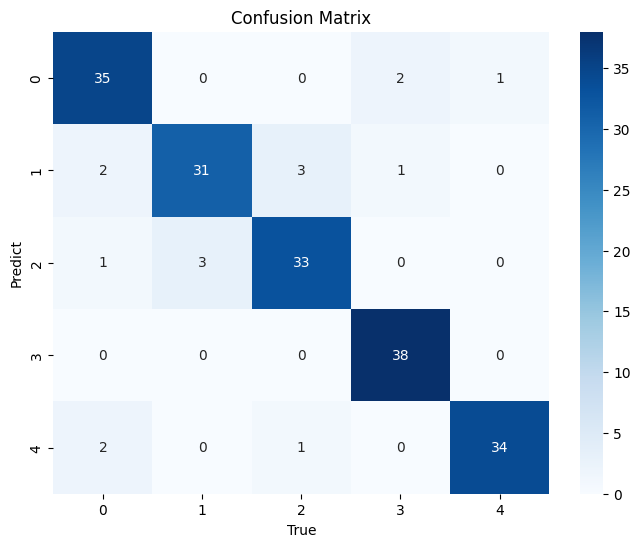

In [90]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#8) Evaluasi Model

Tahapan selanjutnya evaluasi model dengan membandingkan beberapa algoritma yang telah diuji coba dengan tujuan untuk mengetahui algoritma yang menghasilkan prediksi yang paling akurat.

In [91]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'],
                            'Accuracy': [accuracy_knn_smote*100, accuracy_rf_smote*100, accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


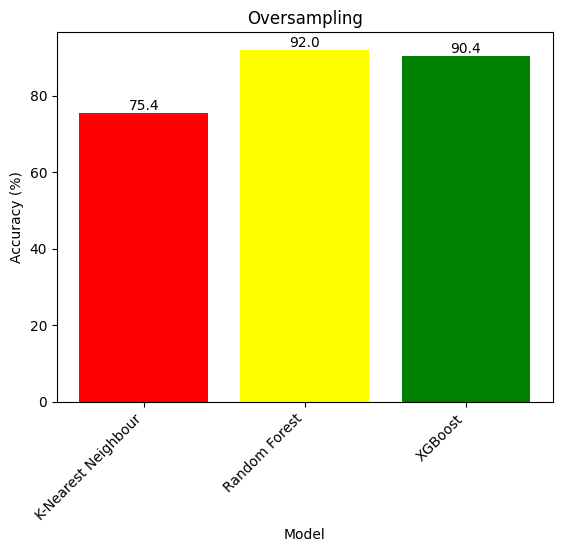

In [92]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'yellow', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversampling')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [93]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'],
                            'Accuracy': [accuracy_knn_smote_normal*100,accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


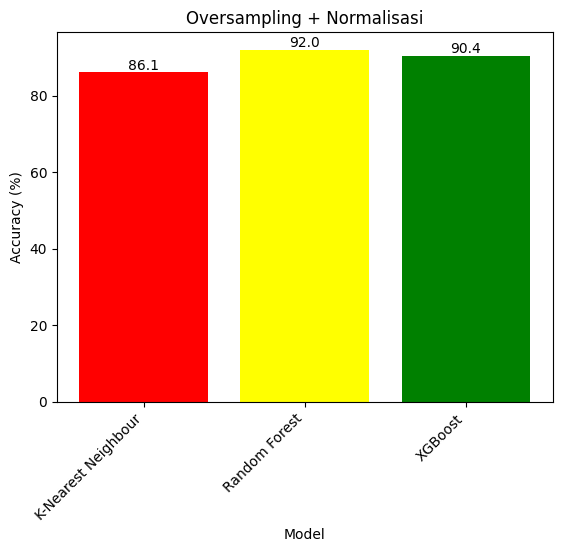

In [94]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'yellow', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversampling + Normalisasi')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [95]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'],
                            'Accuracy': [accuracy_knn_smote_normal_Tun*100,accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,90.9
2,XGBoost,91.4


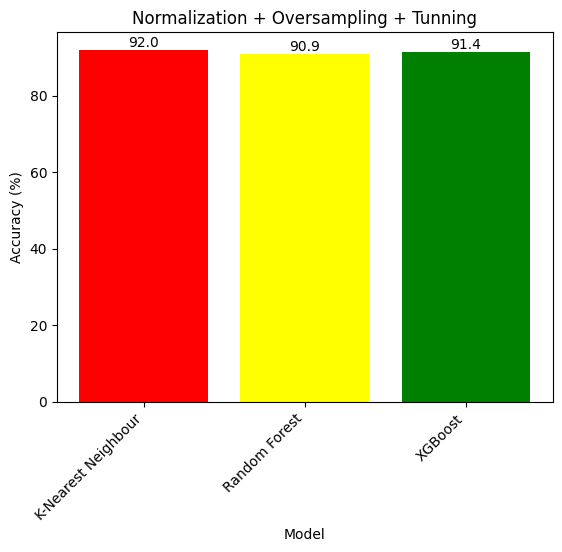

In [96]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'yellow', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [97]:
model_compBest = pd.DataFrame({'Model': ['K-Nearest Neighbour Oversampling+Normalisasi+Tunning', 'Random Forest Oversampling','XGB Oversampling+Normalisasi+Tunning'],
                               'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal_Tun*100]
})

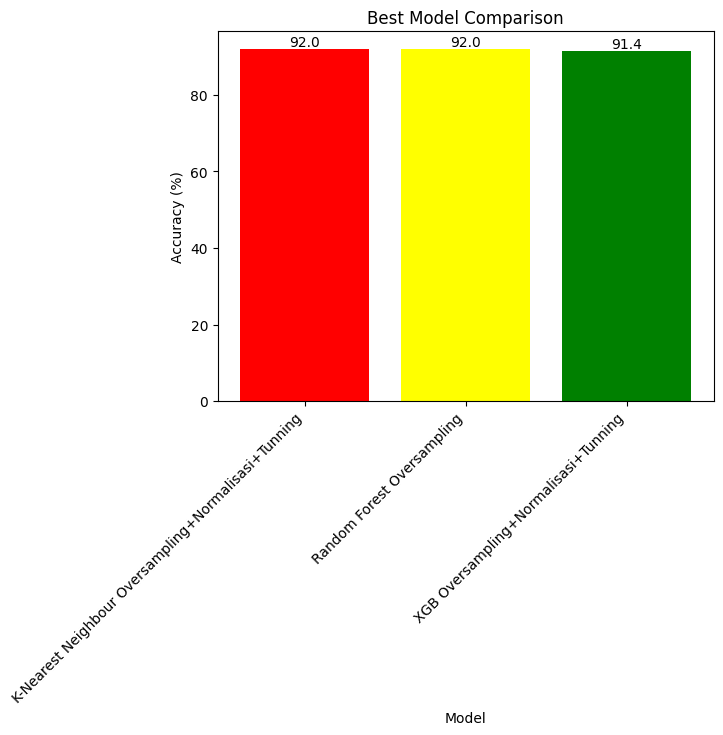

In [98]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'yellow', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

#9) Kesimpulan

Berdasarkan hasil uji coba pada dataset yang hanya dilakukan oversampling dapat dilihat bahwa model dengan menggunakan algoritma Random Forest dan XGBoost mempertahankan performa yang hampir sama dengan akurasi masing-masing 92% dan 90.4%, tetapi KNN menunjukkan penurunan yang signifikan dalam akurasi sebesar 75.4%. Selanjutnya pada dataset yang dilakukan oversampling+normalisasi dapat dilihat bahwa model dengan algoritma Random Forest dapat memberikan performa terbaik dengan akurasi sebesar 92%, diikuti dengan algoritma XGBoost sebesar 90.4% dan KNN sebesar 86.1%. Terakhir, uji coba pada dataset yang dilakukan oversampling+normalisasi+tuning dapat dilihat bahwa ternyata model dengan algoritma KNN memiliki akurasi tertinggi sebesar 92%, yang kemudian diikuti oleh algoritma XGBoost dan Random Forest dengan akurasi masing-masing sebesar 89.8% dan 90.4%.

Dari hasil uji coba yang telah dilakukan dapat disimpulkan bahwa:
1. Penambahan proses tuning setelah dilakukan normalisasi dan oversampling dapat memberikan peningkatan performa untuk model yang menggunakan algoritma KNN
2. Model yang menggunakan algoritma Random Forest dan XGBoost menunjukkan kestabilan dalam performa tanpa perlu dilakukan proses tuning, terutama pada saat dataset telah dilakukan normalisasi+oversampling.

#10) Streamlit Preparation

Berdasarkan analisis ini, jika tujuan utama adalah akurasi dan kita mempertimbangkan kestabilan dari model di berbagai teknik preprocessing, Random Forest mungkin adalah pilihan terbaik untuk aplikasi prediksi penyakit jantung. Hal ini karena model tersebut tidak hanya menunjukkan hasil yang tinggi, tapi juga kestabilan yang baik terlepas dari metode preprocessing yang digunakan. Maka dari itu, kita perlu menyimpan model Random Forest ke dalam bentuk pickle sebelum dilakukan deployment.

In [101]:
import pickle

with open('rf.pkl.pkl', 'wb') as r:
  pickle.dump(rf_model, r)